<function matplotlib.pyplot.show(close=None, block=None)>

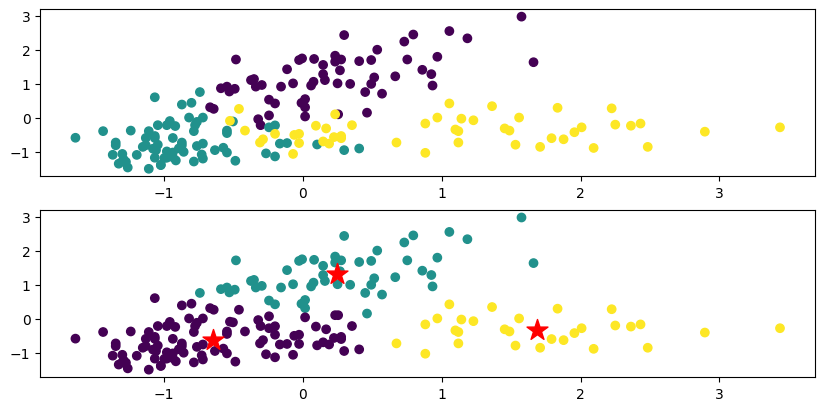

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import cluster, preprocessing

# Wineのデータセット
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']

# データの整形
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

# プロット
%matplotlib inline

x=X_norm[:,0]
y=X_norm[:,1]
z=df_wine["class"]
plt.figure(figsize=(10,10))
plt.subplot(4, 1, 1)
plt.scatter(x,y, c=z)
plt.show

# x-means
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
xm_c = kmeans_plusplus_initializer(X_norm, 2).initialize()
xm_i = xmeans(data=X_norm, initial_centers=xm_c, kmax=20, ccore=True)
xm_i.process()

# 結果をプロット
z_xm = np.ones(X_norm.shape[0])
for k in range(len(xm_i._xmeans__clusters)):
    z_xm[xm_i._xmeans__clusters[k]] = k+1

plt.subplot(4, 1, 2)
plt.scatter(x,y, c=z_xm)
centers = np.array(xm_i._xmeans__centers)
plt.scatter(centers[:,0],centers[:,1],s=250, marker='*',c='red')
plt.show

In [17]:
len(y)

178

In [16]:
res = -1
for i in xm_i._xmeans__clusters:
    for j in i:
        res = max(res, j)
print(res)

177


In [12]:
tmp = np.zeros((224, 224))
for i in range(3):
    for j in xm_i._xmeans__clusters[i]:
        ty = y[j]
        tx = x[j]
        print(ty,tx)
        tmp[ty, tx] = i + 100

-0.03787400699229761 -0.3192755276907569


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [4]:
type(X_norm)

numpy.ndarray